### 1. Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

### 2. Loading the dataset

In [3]:
df = pd.read_csv('Insurance claims data.csv')
pd.set_option('display.max_columns', None)
df

policy_id  subscription_length  vehicle_age  customer_age region_code  \
0      POL045360                  9.3          1.2            41          C8   
1      POL016745                  8.2          1.8            35          C2   
2      POL007194                  9.5          0.2            44          C8   
3      POL018146                  5.2          0.4            44         C10   
4      POL049011                 10.1          1.0            56         C13   
...          ...                  ...          ...           ...         ...   
58587  POL019269                 10.6          2.6            48          C5   
58588  POL001254                  2.3          2.2            37          C3   
58589  POL019859                  6.6          2.2            35          C8   
58590  POL014061                  4.1          3.6            44          C8   
58591  POL054184                  3.1          0.4            49         C12   

       region_density segment model fuel_type     max_torque  \
0                8794      C2    M4    Diesel  250Nm@2750rpm   
1               27003      C1    M9    Diesel  200Nm@1750rpm   
2                8794      C2    M4    Diesel  250Nm@2750rpm   
3               73430       A    M1       CNG   60Nm@3500rpm   
4                5410      B2    M5    Diesel  200Nm@3000rpm   
...               ...     ...   ...       ...            ...   
58587           34738      B2    M6    Petrol  113Nm@4400rpm   
58588            4076      C2    M4    Diesel  250Nm@2750rpm   
58589            8794      B2    M6    Petrol  113Nm@4400rpm   
58590            8794      B2    M6    Petrol  113Nm@4400rpm   
58591           34791      B2    M6    Petrol  113Nm@4400rpm   

               max_power                engine_type  airbags is_esc  \
0      113.45bhp@4000rpm              1.5 L U2 CRDi        6    Yes   
1       97.89bhp@3600rpm                     i-DTEC        2     No   
2      113.45bhp@4000rpm              1.5 L U2 CRDi        6    Yes   
3       40.36bhp@6000rpm          F8D Petrol Engine        2     No   
4       88.77bhp@4000rpm  1.5 Turbocharged Revotorq        2     No   
...                  ...                        ...      ...    ...   
58587   88.50bhp@6000rpm          K Series Dual jet        2     No   
58588  113.45bhp@4000rpm              1.5 L U2 CRDi        6    Yes   
58589   88.50bhp@6000rpm          K Series Dual jet        2     No   
58590   88.50bhp@6000rpm          K Series Dual jet        2     No   
58591   88.50bhp@6000rpm          K Series Dual jet        2     No   

      is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                        Yes     Yes                Yes               Yes   
1                        Yes      No                Yes               Yes   
2                        Yes     Yes                Yes               Yes   
3                         No      No                Yes                No   
4                        Yes      No                Yes                No   
...                      ...     ...                ...               ...   
58587                    Yes      No                Yes                No   
58588                    Yes     Yes                Yes               Yes   
58589                    Yes      No                Yes                No   
58590                    Yes      No                Yes                No   
58591                    Yes      No                Yes                No   

      rear_brakes_type  displacement  cylinder transmission_type  \
0                 Disc          1493         4         Automatic   
1                 Drum          1498         4            Manual   
2                 Disc          1493         4         Automatic   
3                 Drum           796         3            Manual   
4                 Drum          1497         4            Manual   
...                ...           ...       ...               ...   
58587             Drum 

### 3. Data Overview

### Problem Statement

**Develop a predictive model to estimate the likelihood of an insurance claim (claim_status: 0 or 1). The goal is to identify key risk factors to improve risk assessment and pricing for an insurance company. The model should be accurate and interpretable to support efficient decision-making.**

The given dataset contains the following features:

* policy_id: Unique identifier for the insurance policy.

* subscription_length: The duration for which the insurance policy is active.

* customer_age: Age of the insurance policyholder, which can influence the likelihood of claims.

* vehicle_age: Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.

* model: The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.

* fuel_type: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.

* max_torque, max_power: Engine performance characteristics that could relate to the vehicle‚Äôs mechanical condition and claim risks.

* engine_type: The type of engine, which might have implications for maintenance and claim rates.
displacement, cylinder: Specifications related to the engine size and construction, affecting the vehicle‚Äôs performance and potentially its claim history.

* region_code: The code representing the geographical region of the policyholder, as claim patterns can vary regionally.

* region_density: Population density of the policyholder‚Äôs region, which could correlate with accident and claim frequencies.

* airbags: The number of airbags in the vehicle, indicating safety level which can influence claim probability.

* is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System): Features that enhance vehicle safety and could potentially reduce the likelihood of claims.

* is_parking_sensors, is_parking_camera: Parking aids that might affect the probability of making a claim, especially in urban areas.
rear_brakes_type: Type of rear brakes, which could be related to the vehicle‚Äôs stopping capability and safety.

* Features like steering_type, turning_radius, length, width, gross_weight, and various other binary indicators (Yes/No) for specific vehicle amenities and safety features, which together build a profile of the vehicle‚Äôs characteristics and its associated risk factors.

* claim_status: Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.

**3.1 Shape of the Dataset**

In [4]:
df.shape

(58592, 41)

**3.2 Datatypes of all columns**

In [5]:
df.dtypes

policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
steering_type                   

**3.3 Info of the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

**3.4 Summary of the dataset**

In [7]:
df.describe()

subscription_length   vehicle_age  customer_age  region_density  \
count         58592.000000  58592.000000  58592.000000    58592.000000   
mean              6.111688      1.388473     44.823935    18826.858667   
std               4.142790      1.134413      6.935604    17660.174792   
min               0.000000      0.000000     35.000000      290.000000   
25%               2.100000      0.400000     39.000000     6112.000000   
50%               5.700000      1.200000     44.000000     8794.000000   
75%              10.400000      2.200000     49.000000    27003.000000   
max              14.000000     20.000000     75.000000    73430.000000   

            airbags  displacement      cylinder  turning_radius        length  \
count  58592.000000  58592.000000  58592.000000    58592.000000  58592.000000   
mean       3.137066   1162.355851      3.626963        4.852893   3850.476891   
std        1.832641    266.304786      0.483616        0.228061    311.457119   
min        1.000000    796.000000      3.000000        4.500000   3445.000000   
25%        2.000000    796.000000      3.000000        4.600000   3445.000000   
50%        2.000000   1197.000000      4.000000        4.800000   3845.000000   
75%        6.000000   1493.000000      4.000000        5.000000   3995.000000   
max        6.000000   1498.000000      4.000000        5.200000   4300.000000   

              width  gross_weight   ncap_rating  claim_status  
count  58592.000000  58592.000000  58592.000000  58592.000000  
mean    1672.233667   1385.276813      1.759950      0.063968  
std      112.089135    212.423085      1.389576      0.244698  
min     1475.000000   1051.000000      0.000000      0.000000  
25%     1515.000000   1185.000000      0.000000      0.000000  
50%     1735.000000   1335.000000      2.000000      0.000000  
75%     1755.000000   1510.000000      3.000000      0.000000  
max     1811.000000   1720.000000      5.000000      1.000000

### 4. Exploratory data analysis(EDA)

**4.1 Checking null values**

In [9]:
df.isnull().sum().sum()

0

There are no null values

**4.2 Checking duplicate values**

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [policy_id, subscription_length, vehicle_age, customer_age, region_code, region_density, segment, model, fuel_type, max_torque, max_power, engine_type, airbags, is_esc, is_adjustable_steering, is_tpms, is_parking_sensors, is_parking_camera, rear_brakes_type, displacement, cylinder, transmission_type, steering_type, turning_radius, length, width, gross_weight, is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_brake_assist, is_power_door_locks, is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw, is_speed_alert, ncap_rating, claim_status]
Index: []

There are no duplicate values

**4.3 Target Variable Distribution**

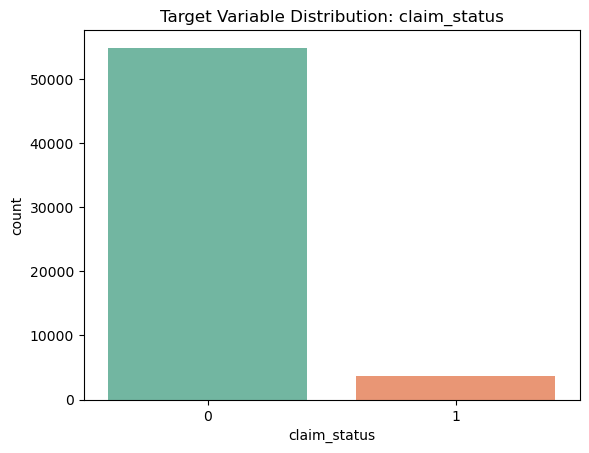

claim_status
0    0.936032
1    0.063968
Name: proportion, dtype: float64


In [4]:
sns.countplot(x = 'claim_status', data = df, palette="Set2")
plt.title('Target Variable Distribution: claim_status')
plt.show()

# Check class proportions
print(df["claim_status"].value_counts(normalize=True))

* 93.6% of the data belongs to class 0 (No Claim)

* 6.4% belongs to class 1 (Claim Made)

* This means we are dealing with a highly imbalanced classification problem, which we‚Äôll handle later using: SMOTE (Synthetic Oversampling) or class weights in model training

**4.4 Numerical Features (Univariate Analysis)** 

In [5]:
numerical_features = df.dtypes[df.dtypes != 'object'].index
numerical_features

Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
       'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
       'width', 'gross_weight', 'ncap_rating', 'claim_status'],
      dtype='object')

In [6]:
# No of Numerical Features
len(numerical_features)

13

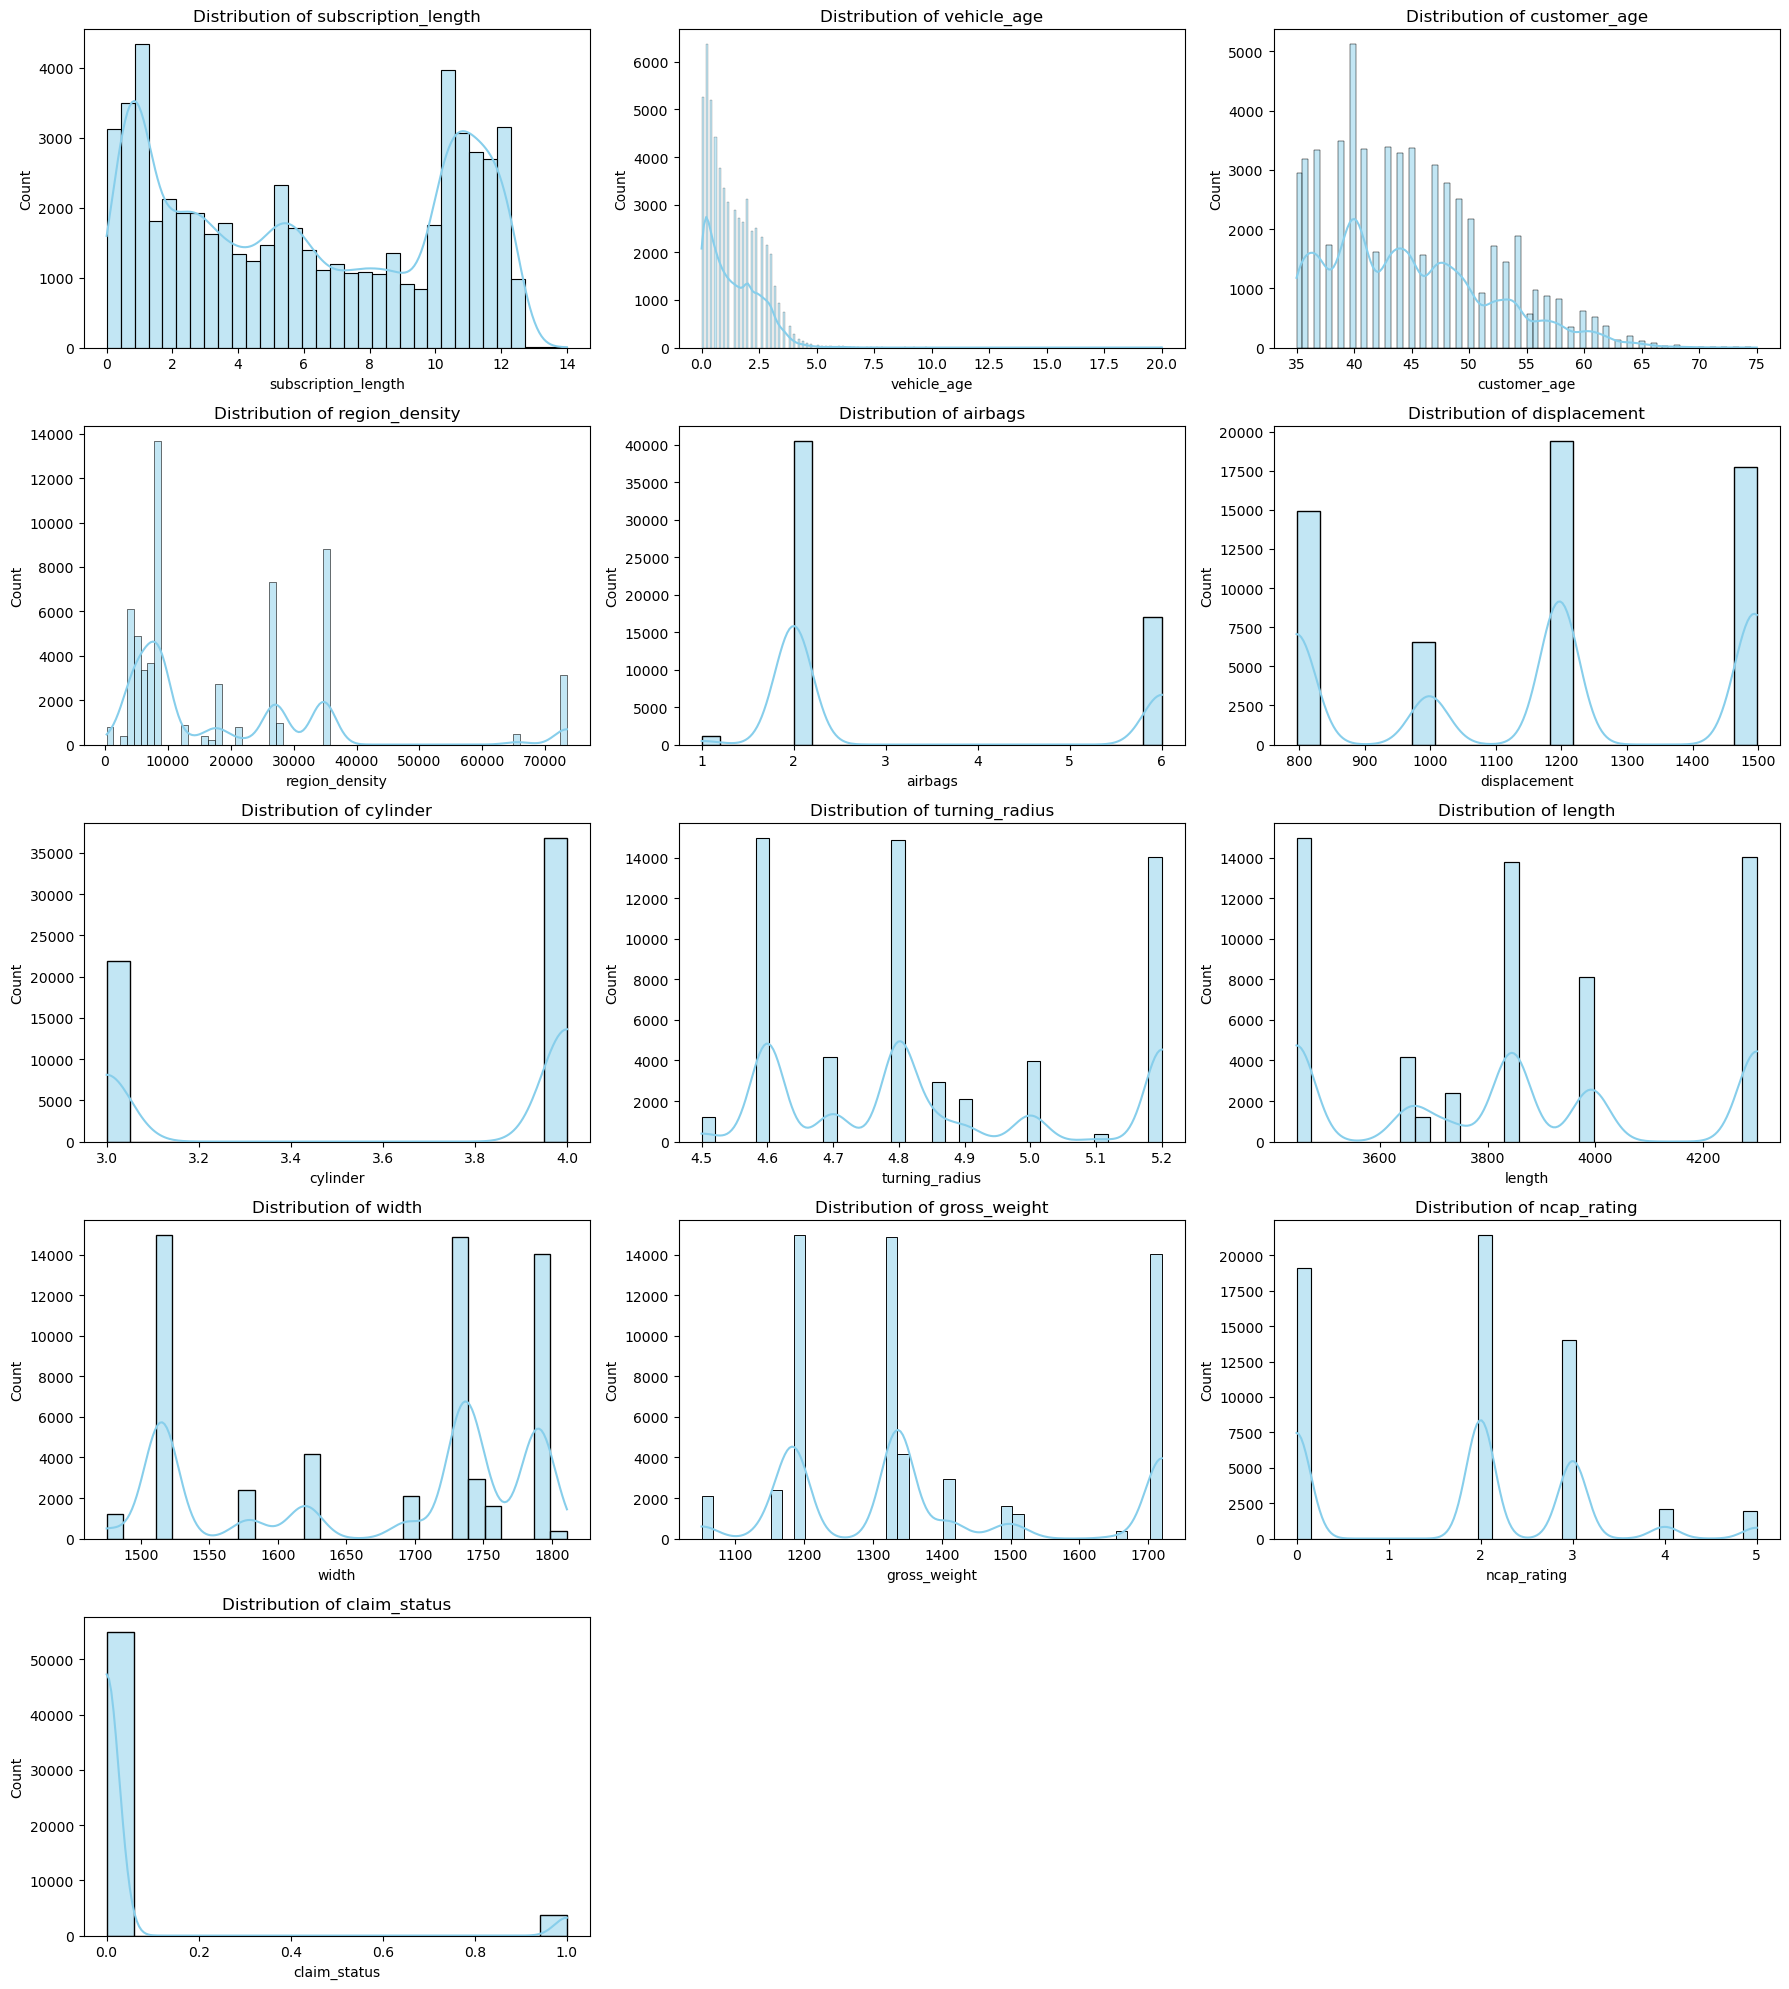

In [7]:
plt.figure(figsize=(18, 20))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("univariate_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

**Insights:**

* subscription_length: Most policies have lengths clustered around 2-4 years and 8-10 years, indicating two common policy durations. A few policies extend beyond 12 years.

* vehicle_age: The majority of vehicles are relatively new (0-5 years), with a sharp decline after 5 years, suggesting that newer vehicles are more commonly insured.

* customer_age: Policyholders are mostly between 30-50 years old, with a peak around 40, indicating a middle-aged demographic. Few customers are below 30 or above 60.

* region_density: Highly skewed, with most regions having low density (<10,000), but a few regions have extremely high density (up to 70,000), likely urban areas.

* airbags: Most vehicles have either 2 or 6 airbags, with 2 being the most common. Very few vehicles have 1 or 4 airbags.

* displacement: Engine displacement is mostly between 800-1500 cc, with peaks at 1000 and 1200 cc, typical for compact and mid-size vehicles.

* cylinder: Most vehicles have 3 or 4 cylinders, with 4-cylinder engines being more common. Very few have 3.2 or 3.8 cylinders, possibly due to data noise or rare engine types.

* turning_radius: Most vehicles have a turning radius of 4.8-5.0 meters, with a smaller peak at 4.5 meters, indicating standard vehicle maneuverability.

* length: Vehicle lengths are mostly between 3600-4000 mm, with a peak at 3800 mm, typical for compact cars. Few vehicles exceed 4500 mm.

* width: Widths are concentrated between 1650-1800 mm, with a peak at 1750 mm, again typical for compact to mid-size vehicles.

* gross_weight: Most vehicles weigh between 1100-1500 kg, with a peak at 1300 kg. A smaller group weighs around 1700 kg, possibly larger vehicles.

* ncap_rating: Most vehicles have an NCAP rating of 0, with some at 2-4. Very few have a rating of 5, indicating low safety ratings in the dataset.

* ncap_rating, cylinder are essentially categorical.

* claim_status: The dataset is imbalanced, with far more policies having no claims (0) than claims (1), which could affect model performance.

**What can be done?**

* Handle Imbalanced Data (claim_status): Use techniques like oversampling (e.g., SMOTE), undersampling, or class weighting to address the imbalance in claim_status for better model performance.

* Feature Engineering:
Bin continuous variables like customer_age, vehicle_age, and region_density into categorical ranges to capture non-linear relationships with claim_status.

* Address Skewed Features: Apply transformations (e.g., log transformation) to highly skewed features like region_density to normalize their distribution.

**4.4.1 Feature Engineering**

In [35]:
# Binning continuous features

In [10]:
print(df['vehicle_age'].min(), df['vehicle_age'].max())

0.0 20.0


In [11]:
df['customer_age_bin'] = pd.cut(df['customer_age'], bins = [0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
df['vehicle_age_bin'] = pd.cut(df['vehicle_age'], bins=[-0.01, 5, 10, 15, 20], labels=['0-5', '5-10', '10-15', '15-20'], include_lowest=True)

In [13]:
# Apply log transformation to region_density to handle skewness

In [14]:
df['region_density_log'] = np.log1p(df['region_density'])

In [15]:
df1 = df.copy(deep=True)

In [16]:
df1.drop(columns=['customer_age', 'vehicle_age'], inplace=True)

In [17]:
num_cols = df1.dtypes[df1.dtypes != 'object'].index
num_cols

Index(['subscription_length', 'region_density', 'airbags', 'displacement',
       'cylinder', 'turning_radius', 'length', 'width', 'gross_weight',
       'ncap_rating', 'claim_status', 'customer_age_bin', 'vehicle_age_bin',
       'region_density_log'],
      dtype='object')

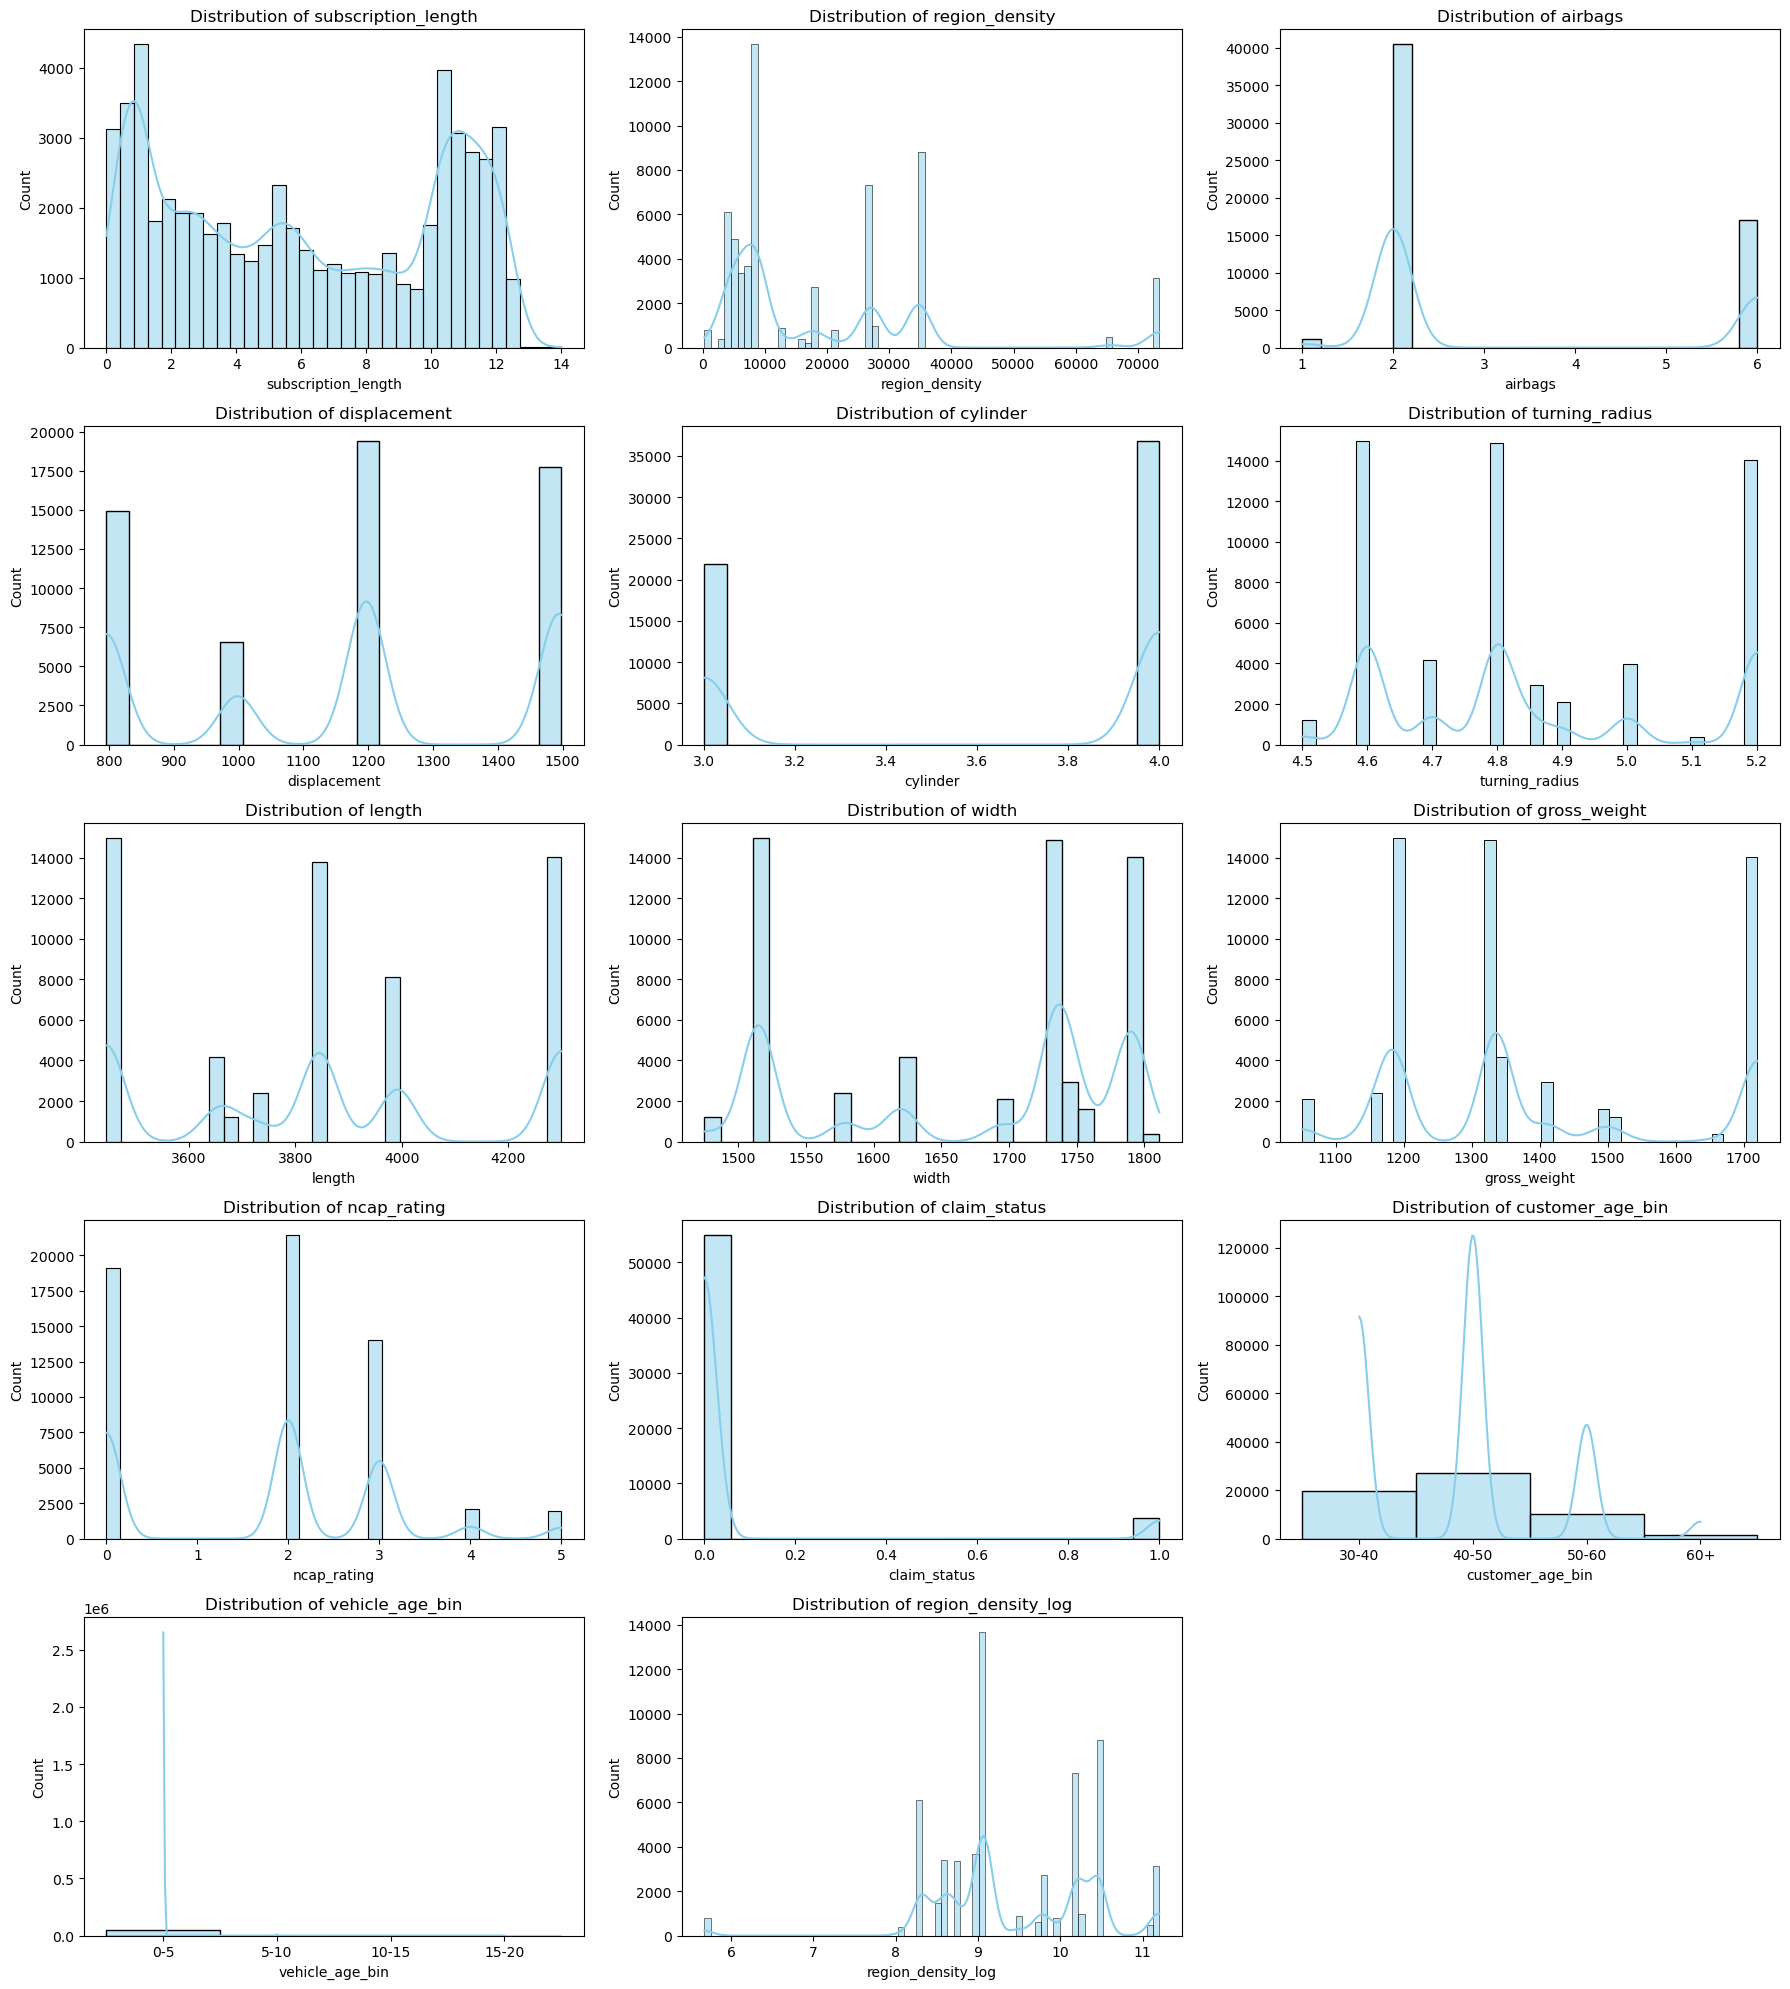

In [94]:
plt.figure(figsize=(18, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df1[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.savefig("univariate_analysis1.png", dpi=300, bbox_inches='tight')
plt.show()

In [63]:
# Convert ncap_rating and cylinder to categorical type
# df['ncap_rating'] = df['ncap_rating'].astype('category')
# df['cylinder'] = df['cylinder'].astype('category')

**4.5 Categorical Features (Univariate Analysis)**

In [18]:
categorical_features = df1.describe(include = 'object').columns.to_list()
categorical_features

['policy_id',
 'region_code',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [19]:
cat_cols_1 = ['region_code','segment','model','fuel_type', 'max_torque','max_power', 'engine_type']

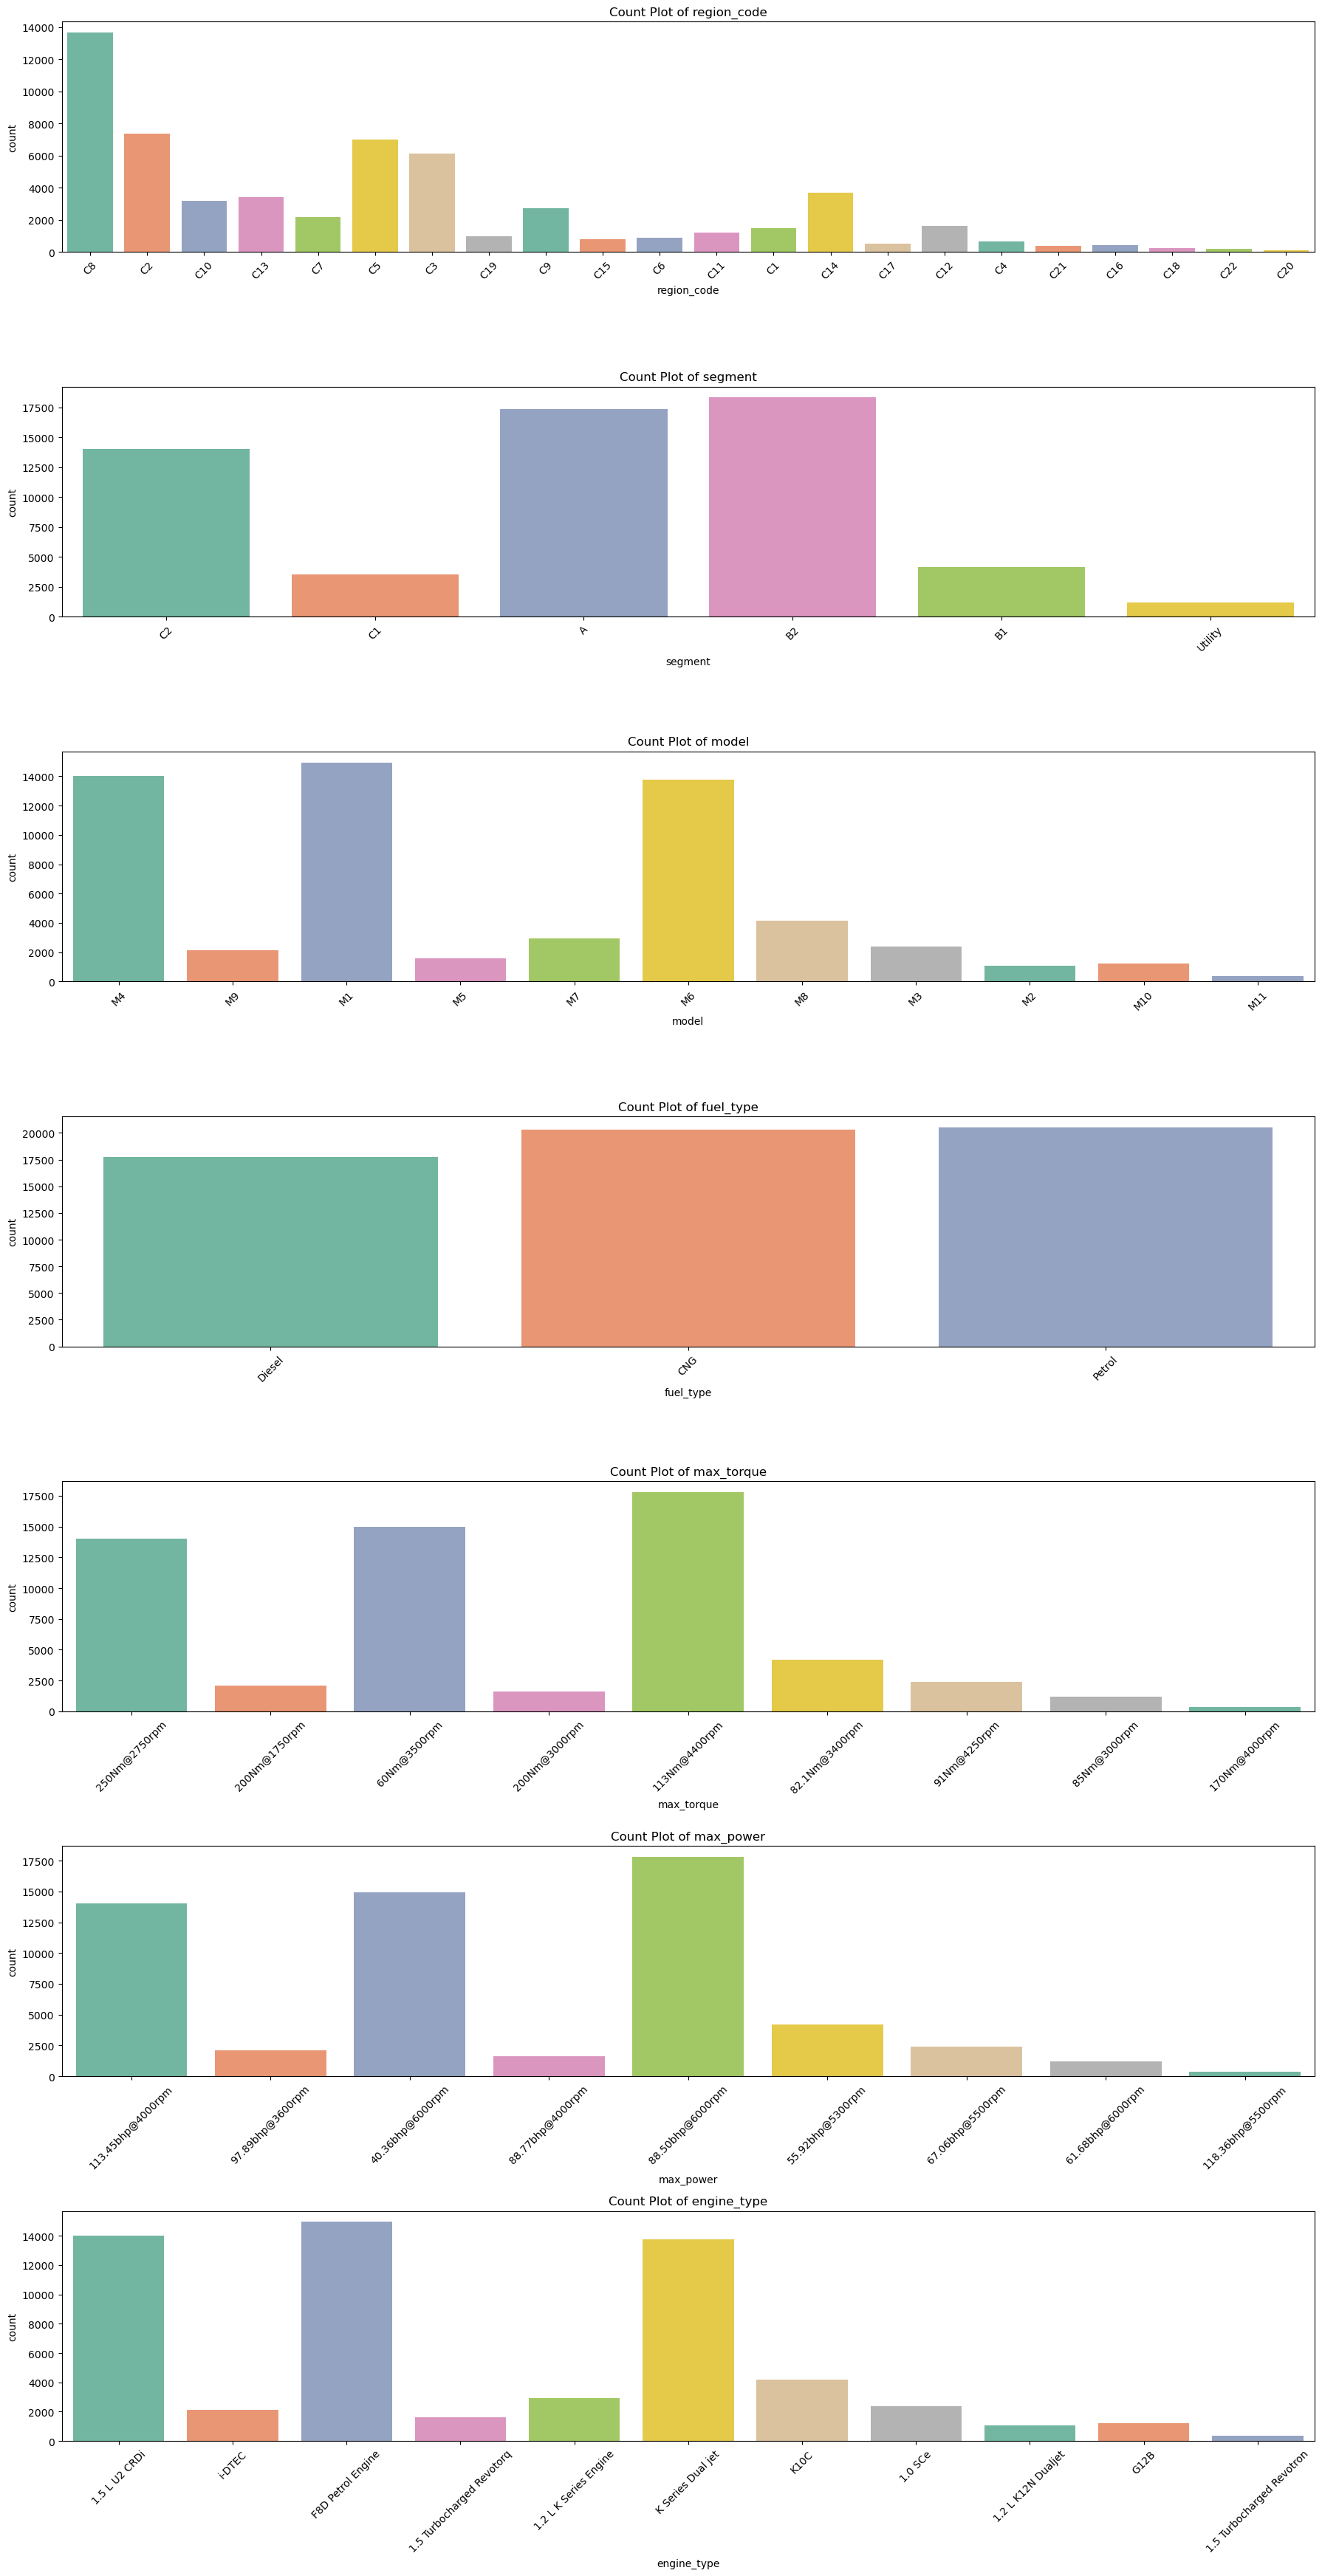

In [99]:
plt.figure(figsize=(18, 5 * len(cat_cols_1)))

for i, col in enumerate(cat_cols_1, 1):
    plt.subplot(len(cat_cols_1), 1, i)
    sns.countplot(data=df1, x=col, palette="Set2")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
plt.show()

In [20]:
cat_cols_2 = ['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type']

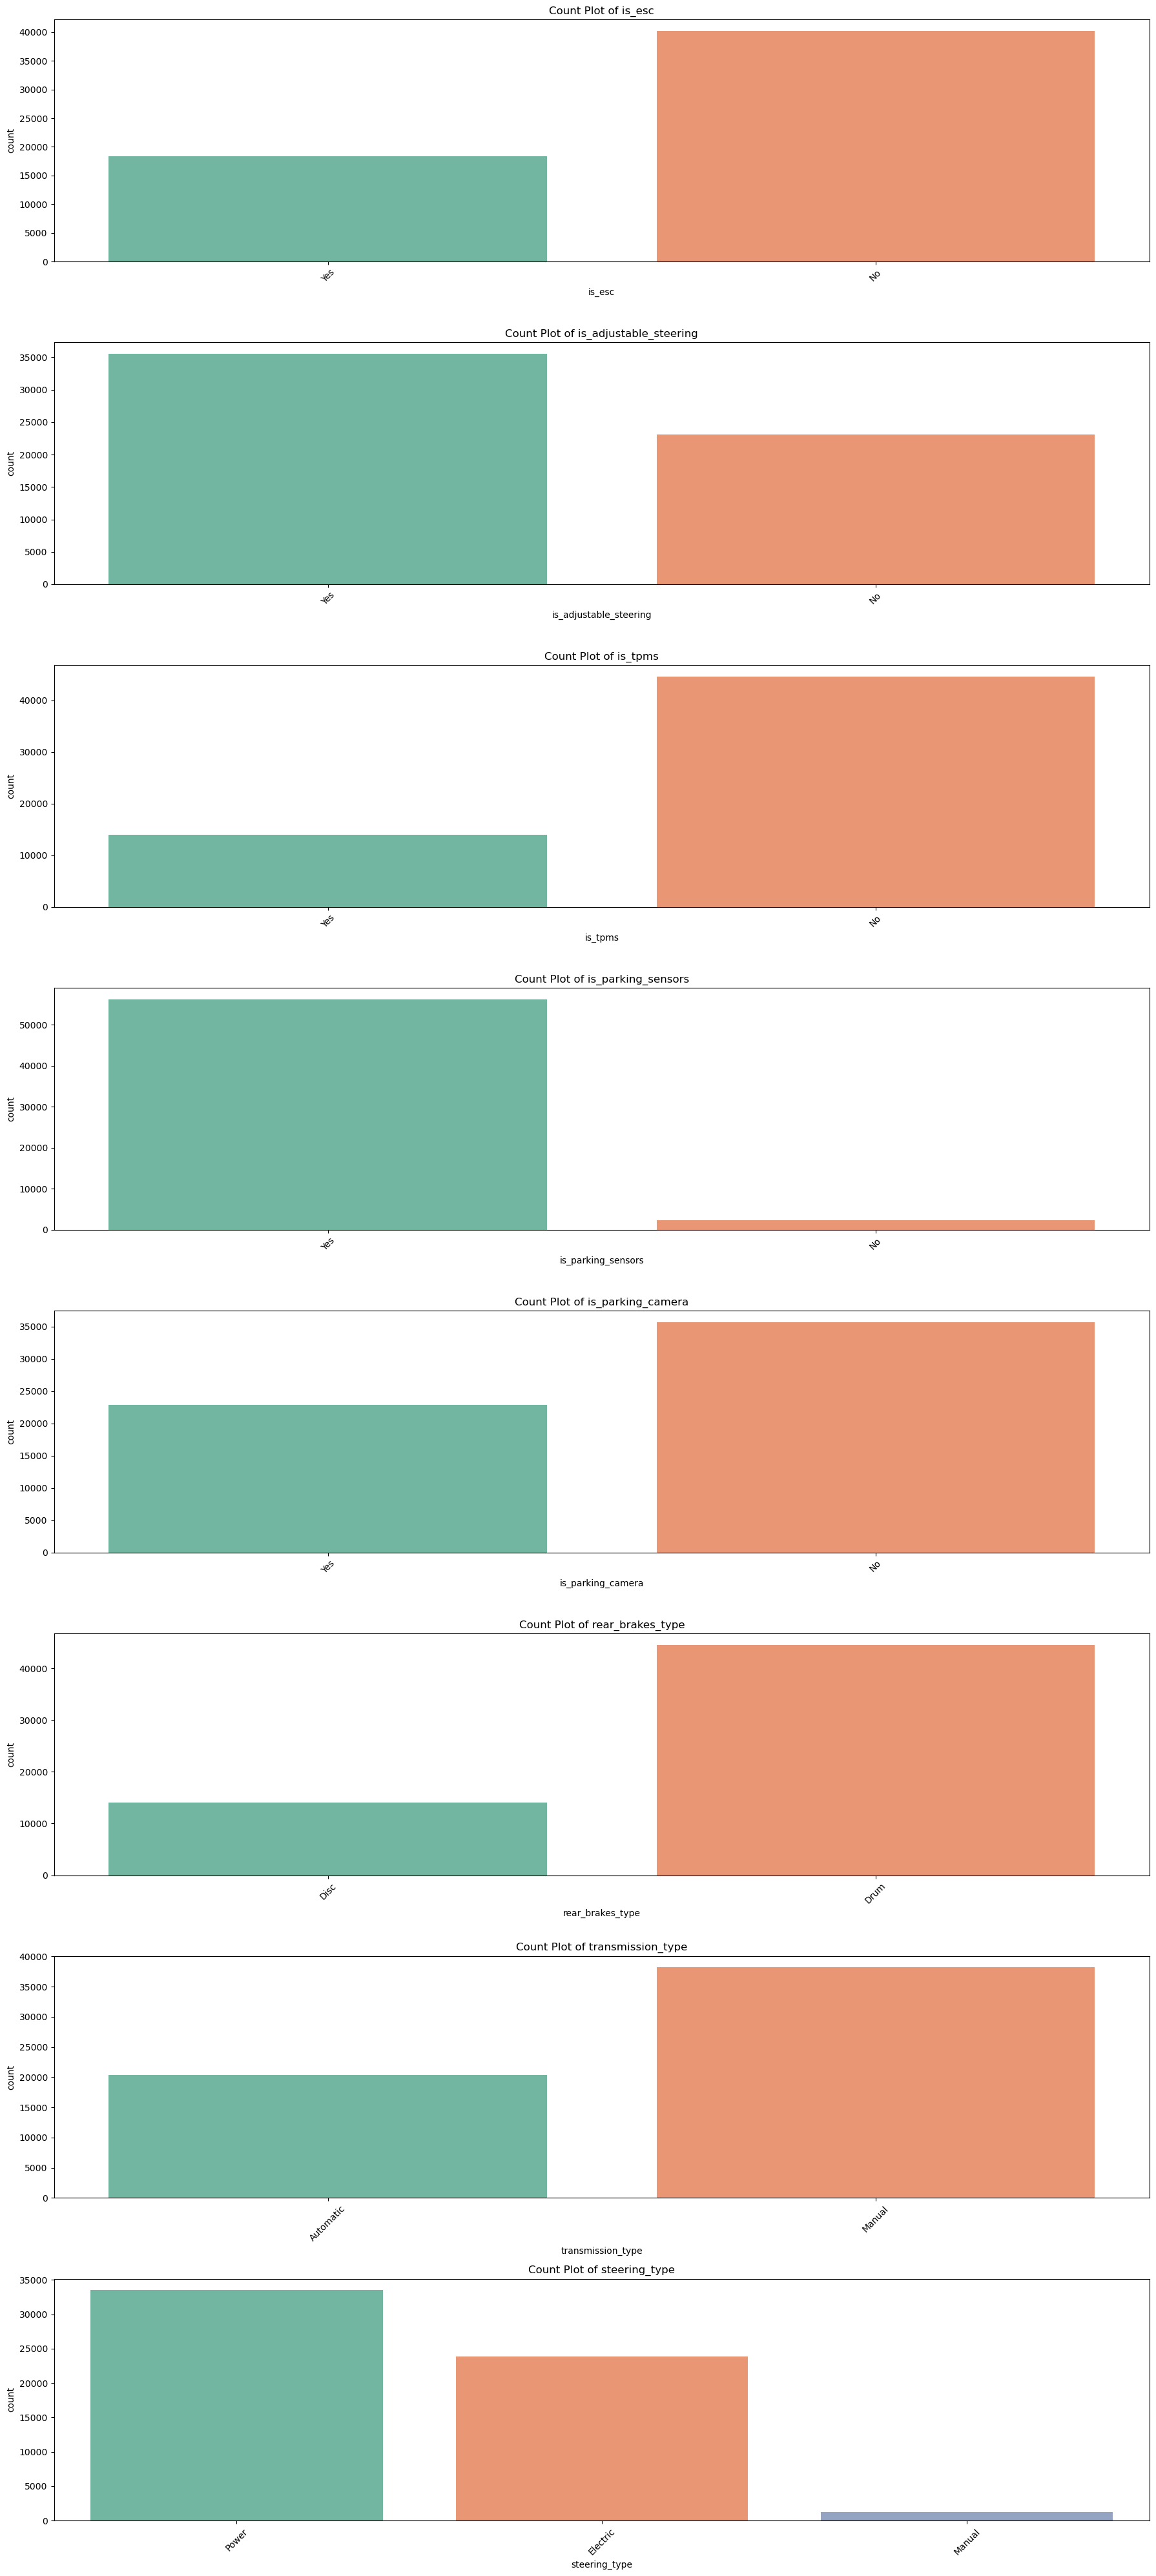

In [101]:
plt.figure(figsize=(18, 5 * len(cat_cols_2)))

for i, col in enumerate(cat_cols_2, 1):
    plt.subplot(len(cat_cols_2), 1, i)
    sns.countplot(data=df1, x=col, palette="Set2")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
plt.show()

In [21]:
for i in categorical_features:
    print(df1[i].value_counts())
    print(f'No of unique values in {i} = {df1[i].nunique()}')
    print(df1.groupby(i)['claim_status'].value_counts(normalize = True) * 100)
    print('--'*20)

policy_id
POL045360    1
POL043478    1
POL046094    1
POL055205    1
POL005001    1
            ..
POL033388    1
POL002614    1
POL039334    1
POL002594    1
POL054184    1
Name: count, Length: 58592, dtype: int64
No of unique values in policy_id = 58592
policy_id  claim_status
POL000001  0               100.0
POL000002  0               100.0
POL000003  0               100.0
POL000004  0               100.0
POL000005  0               100.0
                           ...  
POL058588  0               100.0
POL058589  0               100.0
POL058590  0               100.0
POL058591  0               100.0
POL058592  0               100.0
Name: proportion, Length: 58592, dtype: float64
----------------------------------------
region_code
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18     

**Observations**

* policy_id is a unique identifier of each customer, so drop that column

* segment is showing similar value counts for all, so Keep for now

* fuel_type is showing similar value counts for all, so Keep for now

* max_torque and max_power are likely highly correlated (since they both describe engine performance), so keep one and drop the other

* Keep: is_speed_alert, is_brake_assist, is_adjustable_steering, is_driver_seat_height_adjustable, is_front_fog_lights, is_day_night_rear_view_mirror (show some variation).

* Drop Redundant: Drop two of is_power_door_locks, is_central_locking, is_ecw (keep one, e.g., is_central_locking). Drop one of is_rear_window_wiper or is_rear_window_washer (keep one, e.g., is_rear_window_wiper).

* Drop Low Variation: Drop is_tpms, is_parking_sensors, is_parking_camera, is_power_steering, is_rear_window_defogger, transmission_type, rear_brakes_type (very small variation in claim proportions, ~0.1-0.3%).

**Recommendations**

Columns to Drop:
1. No Predictive Power:

policy_id: Unique identifier with no variation in claim_status.

2. Redundant Features:

Drop two of is_power_door_locks, is_central_locking, is_ecw (e.g., drop is_power_door_locks, is_ecw, keep is_central_locking).

Drop one of is_rear_window_wiper, is_rear_window_washer (e.g., drop is_rear_window_washer, keep is_rear_window_wiper).

3. Low Variation in Claim Proportions:

is_tpms, is_parking_sensors, is_parking_camera, is_power_steering, is_rear_window_defogger, transmission_type, rear_brakes_type.

4. Highly Correlated Features:

Drop one of max_torque or max_power (e.g., drop max_power, keep max_torque).


Columns to Keep:

1. High Variation in Claim Proportions:

region_code, model, is_speed_alert.

2. Moderate Variation:

segment, fuel_type, engine_type, steering_type, max_torque (or max_power), is_brake_assist, is_adjustable_steering, is_driver_seat_height_adjustable, is_front_fog_lights, is_day_night_rear_view_mirror.

3. Kept After Dropping Redundant:

is_central_locking, is_rear_window_wiper.


**Correlation Check:** During modeling, check for correlations between model, engine_type, and fuel_type. If highly correlated, you might drop one (e.g., engine_type).

In [22]:
df2 = df1.copy(deep=True)

In [23]:
df2.drop(columns=['policy_id', 'is_power_door_locks', 'is_ecw', 'is_rear_window_washer', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 
                  'is_power_steering', 'is_rear_window_defogger', 'transmission_type', 'rear_brakes_type', 'max_power'], inplace=True)
df2

subscription_length region_code  region_density segment model  \
0                      9.3          C8            8794      C2    M4   
1                      8.2          C2           27003      C1    M9   
2                      9.5          C8            8794      C2    M4   
3                      5.2         C10           73430       A    M1   
4                     10.1         C13            5410      B2    M5   
...                    ...         ...             ...     ...   ...   
58587                 10.6          C5           34738      B2    M6   
58588                  2.3          C3            4076      C2    M4   
58589                  6.6          C8            8794      B2    M6   
58590                  4.1          C8            8794      B2    M6   
58591                  3.1         C12           34791      B2    M6   

      fuel_type     max_torque                engine_type  airbags is_esc  \
0        Diesel  250Nm@2750rpm              1.5 L U2 CRDi        6    Yes   
1        Diesel  200Nm@1750rpm                     i-DTEC        2     No   
2        Diesel  250Nm@2750rpm              1.5 L U2 CRDi        6    Yes   
3           CNG   60Nm@3500rpm          F8D Petrol Engine        2     No   
4        Diesel  200Nm@3000rpm  1.5 Turbocharged Revotorq        2     No   
...         ...            ...                        ...      ...    ...   
58587    Petrol  113Nm@4400rpm          K Series Dual jet        2     No   
58588    Diesel  250Nm@2750rpm              1.5 L U2 CRDi        6    Yes   
58589    Petrol  113Nm@4400rpm          K Series Dual jet        2     No   
58590    Petrol  113Nm@4400rpm          K Series Dual jet        2     No   
58591    Petrol  113Nm@4400rpm          K Series Dual jet        2     No   

      is_adjustable_steering  displacement  cylinder steering_type  \
0                        Yes          1493         4         Power   
1                        Yes          1498         4      Electric   
2                        Yes          1493         4         Power   
3                         No           796         3         Power   
4                        Yes          1497         4      Electric   
...                      ...           ...       ...           ...   
58587                    Yes          1197         4      Electric   
58588                    Yes          1493         4         Power   
58589                    Yes          1197         4      Electric   
58590                    Yes          1197         4      Electric   
58591                    Yes          1197         4      Electric   

       turning_radius  length  width  gross_weight is_front_fog_lights  \
0                 5.2    4300   1790          1720                 Yes   
1                 4.9    3995   1695          1051                 Yes   
2                 5.2    4300   1790          1720                 Yes   
3                 4.6    3445   1515          1185                  No   
4                 5.0    3990   1755          1490                  No   
...               ...     ...    ...           ...                 ...   
58587             4.8    3845   1735          1335                 Yes   
58588             5.2    4300   1790          1720                 Yes   
58589             4.8    3845   1735          1335                 Yes   
58590             4.8    3845   1735          1335                 Yes   
58591             4.8    3845   1735          1335                 Yes   

      is_rear_window_wiper is_brake_assist is_central_locking  \
0                      Yes             Yes                Yes   
1                       No              No                Yes   
2                      Yes             Yes                Yes   
3                       No              No                 No   
4                       No              No                Yes   
...                    ...             ...                ...   
58587                   No      

**4.6 Bivariate Analysis (Categorical vs Target)**

In [24]:
df2.describe(include = 'object').columns.to_list()

['region_code',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_brake_assist',
 'is_central_locking',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_speed_alert']

In [25]:
categorical_cols = df2.describe(include = 'object').columns.to_list()

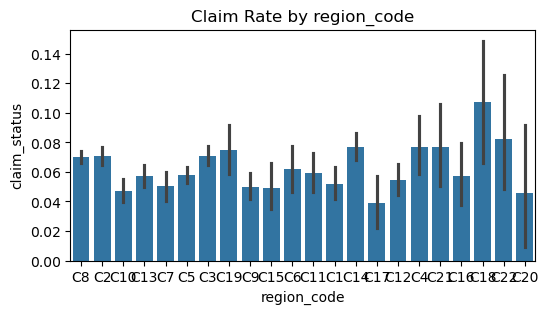

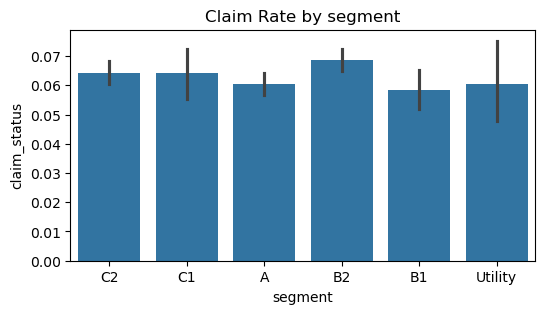

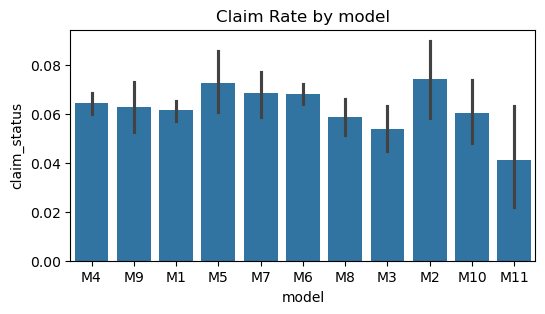

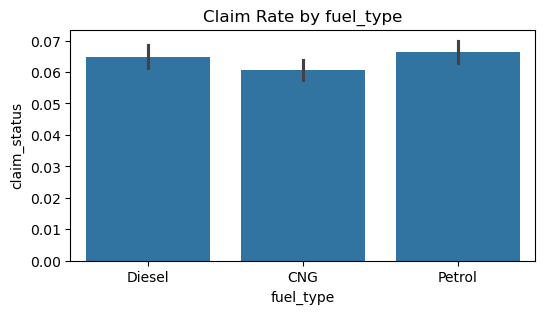

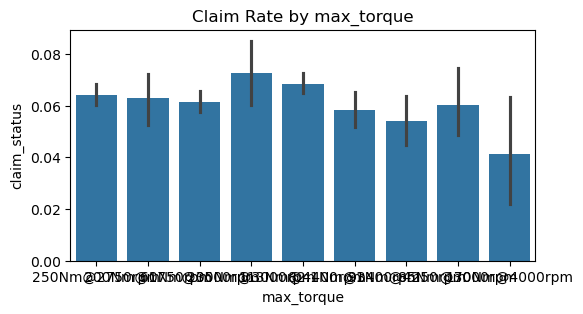

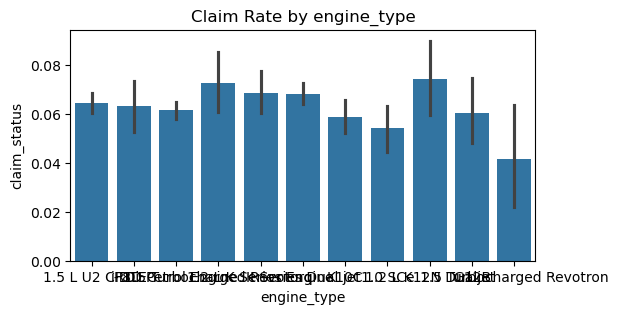

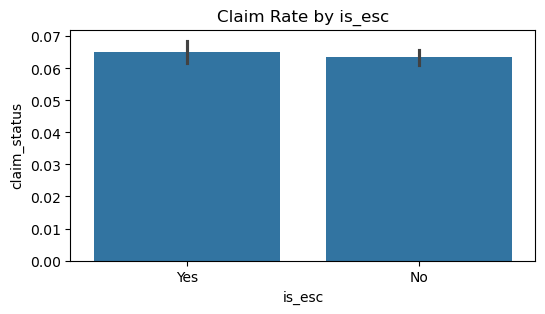

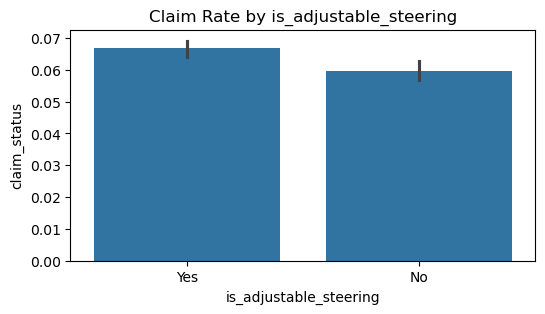

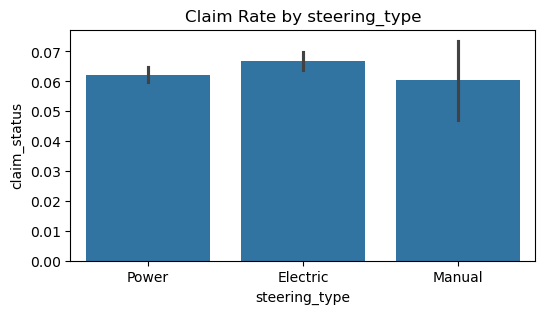

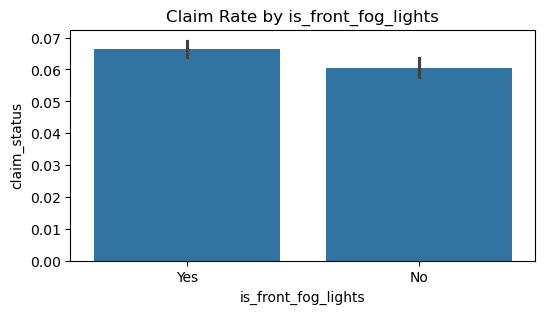

In [109]:
for col in categorical_cols[:10]:  # first 10 for brevity
    plt.figure(figsize=(6, 3))
    sns.barplot(x=col, y="claim_status", data=df2)
    plt.title(f"Claim Rate by {col}")
    plt.show()

**4.7 Correlation Heatmap (for numeric features)**

In [26]:
df2.describe(exclude = 'object').columns.to_list()

['subscription_length',
 'region_density',
 'airbags',
 'displacement',
 'cylinder',
 'turning_radius',
 'length',
 'width',
 'gross_weight',
 'ncap_rating',
 'claim_status',
 'customer_age_bin',
 'vehicle_age_bin',
 'region_density_log']

In [27]:
numerical_cols = df2.select_dtypes(include=["int64", "float64"])

In [28]:
corr_matrix = numerical_cols.corr()

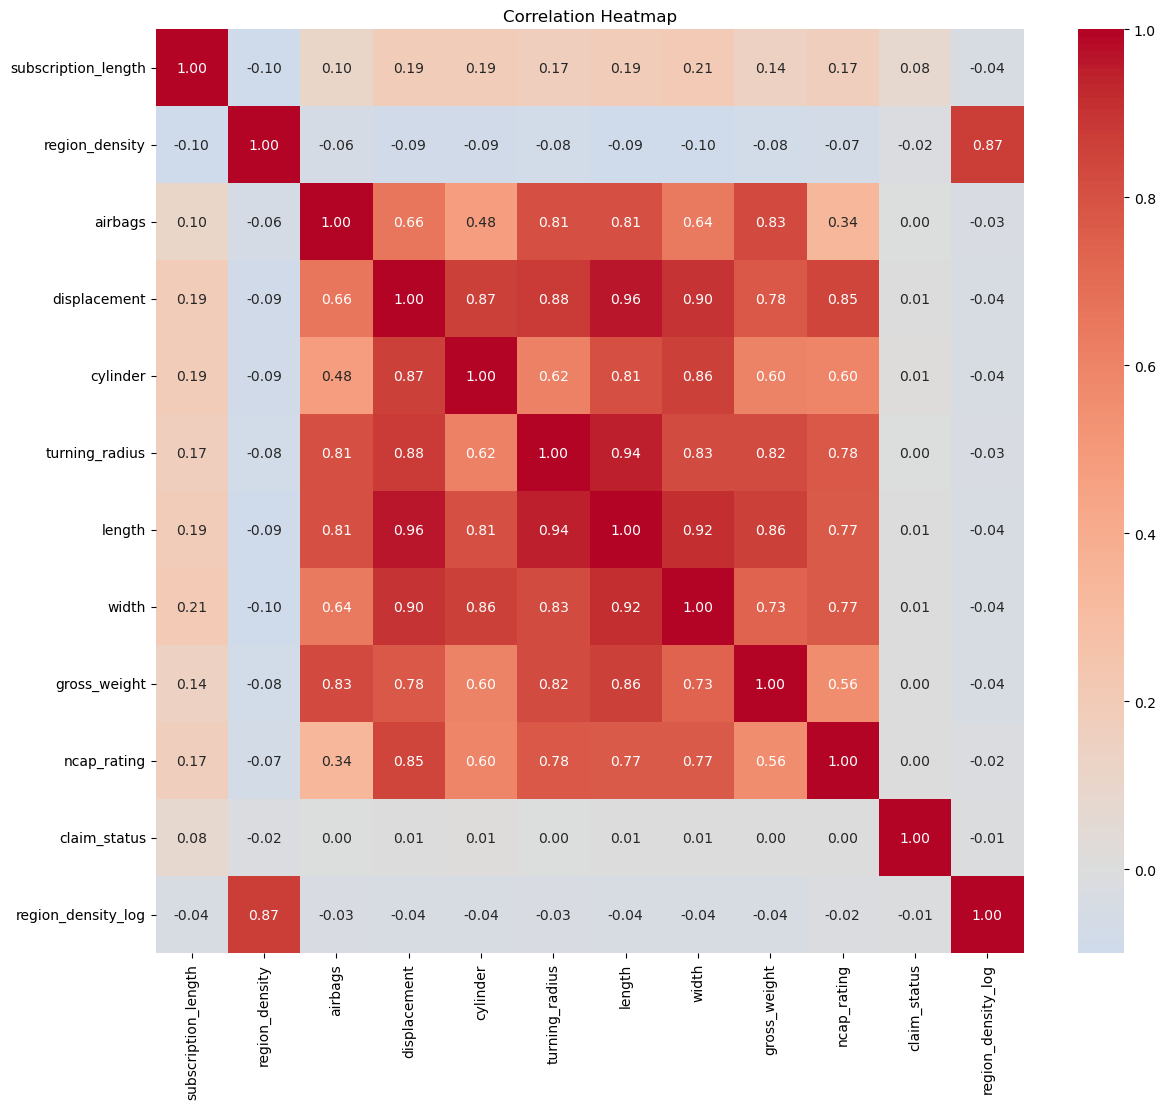

In [29]:
# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.savefig('Correlation Heatmap.png',dpi=300, bbox_inches='tight')
plt.show()

Note:

Drop region_density, length, width, displacement, turning_radius, cylinder, airbags, and gross_weight due to high multicollinearity.

In [30]:
df2.drop(columns=['width','length', 'displacement', 'turning_radius', 'cylinder', 'airbags', 'gross_weight','region_density'], inplace=True)
df2

subscription_length region_code segment model fuel_type     max_torque  \
0                      9.3          C8      C2    M4    Diesel  250Nm@2750rpm   
1                      8.2          C2      C1    M9    Diesel  200Nm@1750rpm   
2                      9.5          C8      C2    M4    Diesel  250Nm@2750rpm   
3                      5.2         C10       A    M1       CNG   60Nm@3500rpm   
4                     10.1         C13      B2    M5    Diesel  200Nm@3000rpm   
...                    ...         ...     ...   ...       ...            ...   
58587                 10.6          C5      B2    M6    Petrol  113Nm@4400rpm   
58588                  2.3          C3      C2    M4    Diesel  250Nm@2750rpm   
58589                  6.6          C8      B2    M6    Petrol  113Nm@4400rpm   
58590                  4.1          C8      B2    M6    Petrol  113Nm@4400rpm   
58591                  3.1         C12      B2    M6    Petrol  113Nm@4400rpm   

                     engine_type is_esc is_adjustable_steering steering_type  \
0                  1.5 L U2 CRDi    Yes                    Yes         Power   
1                         i-DTEC     No                    Yes      Electric   
2                  1.5 L U2 CRDi    Yes                    Yes         Power   
3              F8D Petrol Engine     No                     No         Power   
4      1.5 Turbocharged Revotorq     No                    Yes      Electric   
...                          ...    ...                    ...           ...   
58587          K Series Dual jet     No                    Yes      Electric   
58588              1.5 L U2 CRDi    Yes                    Yes         Power   
58589          K Series Dual jet     No                    Yes      Electric   
58590          K Series Dual jet     No                    Yes      Electric   
58591          K Series Dual jet     No                    Yes      Electric   

      is_front_fog_lights is_rear_window_wiper is_brake_assist  \
0                     Yes                  Yes             Yes   
1                     Yes                   No              No   
2                     Yes                  Yes             Yes   
3                      No                   No              No   
4                      No                   No              No   
...                   ...                  ...             ...   
58587                 Yes                   No             Yes   
58588                 Yes                  Yes             Yes   
58589                 Yes                   No             Yes   
58590                 Yes                   No             Yes   
58591                 Yes                   No             Yes   

      is_central_locking is_driver_seat_height_adjustable  \
0                    Yes                              Yes   
1                    Yes                              Yes   
2                    Yes                              Yes   
3                     No                               No   
4                    Yes                               No   
...                  ...                              ...   
58587                Yes                              Yes   
58588                Yes                              Yes   
58589                Yes                              Yes   
58590                Yes                              Yes   
58591                Yes                              Yes   

      is_day_night_rear_view_mirror is_speed_alert  ncap_rating  claim_status  \
0                                No            Yes            3             0   
1                               Yes            Yes            4             0   
2                                No            Yes            3             0   
3                                No            Yes            0             0   
4                                No            Yes            5             0   
...                             ...            ...          .

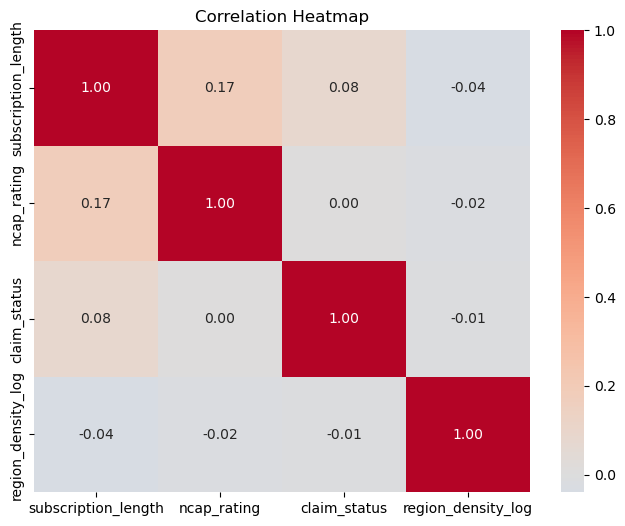

In [31]:
numerical_cols = df2.select_dtypes(include=["int64", "float64"])
corr_matrix = numerical_cols.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.savefig('Correlation Heatmap.png',dpi=300, bbox_inches='tight')
plt.show()

**4.8 Outlier Detection** 

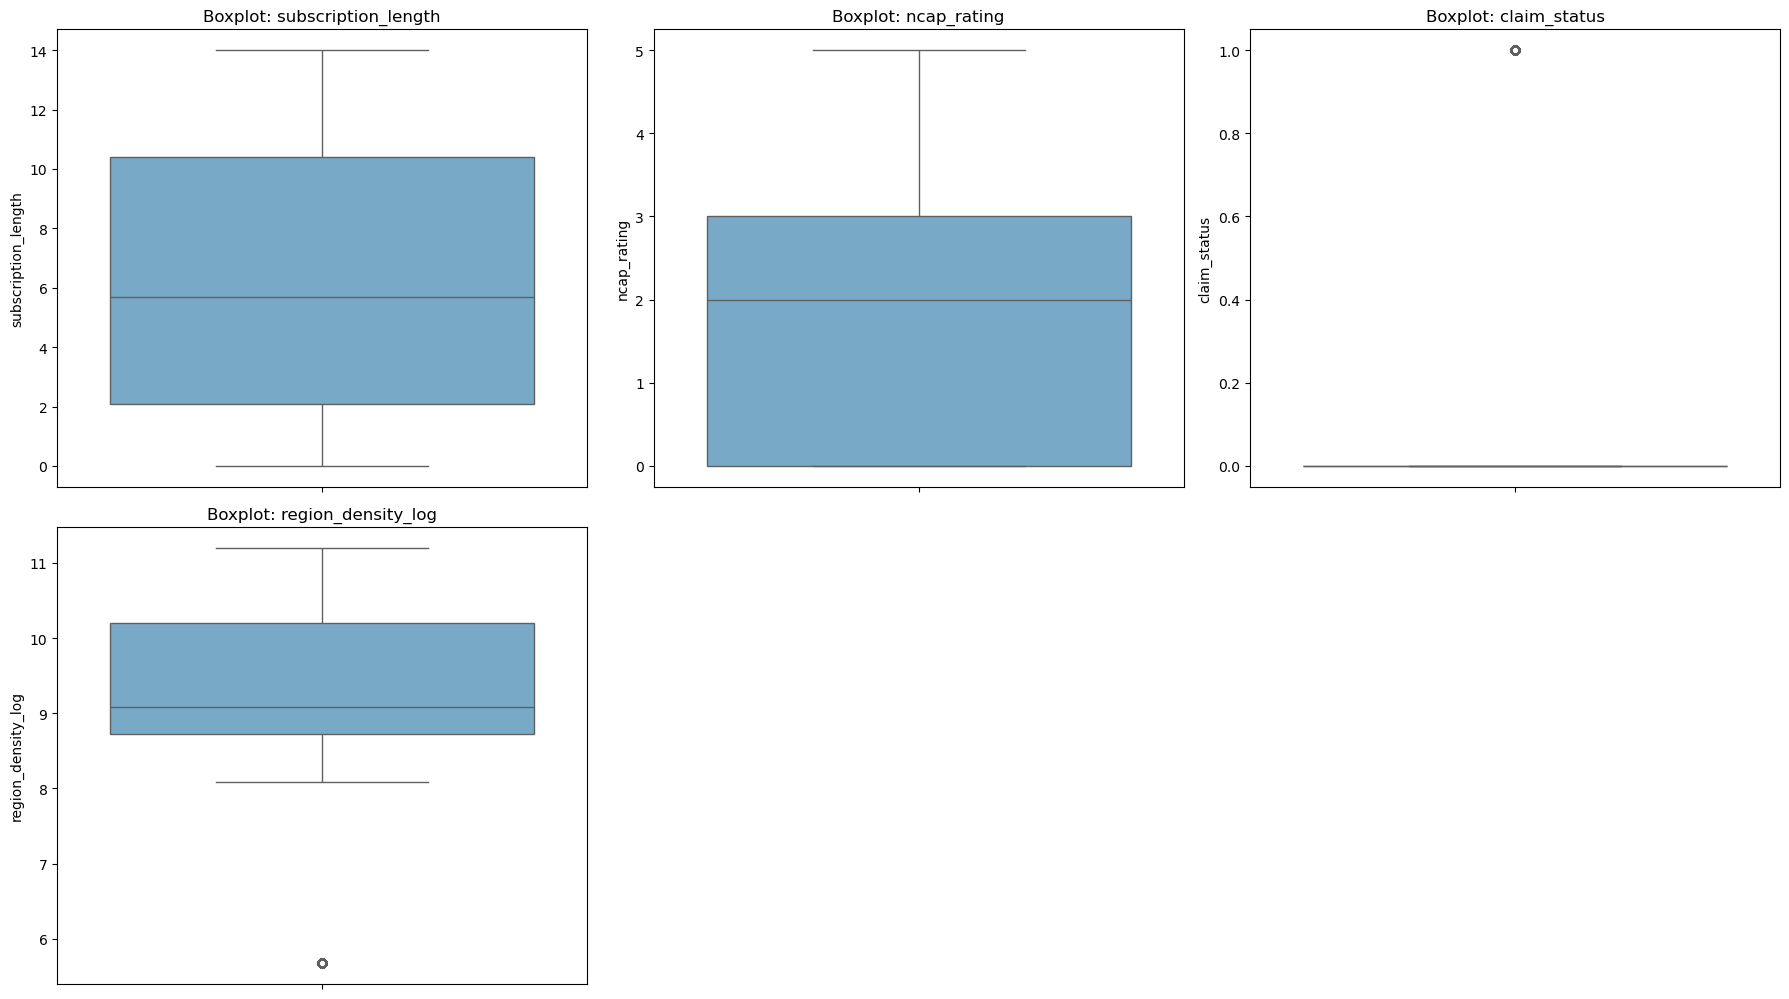

In [32]:
plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_cols, 1):  # previously defined 'numerics' list
    plt.subplot(4, 3, i)
    sns.boxplot(data=df2, y=col, palette="Blues")
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

In [34]:
df3 = df2.copy(deep=True)

### 5. Data Preprocessing (Encode Categoricals + Binary Mapping)

**5.1 Convert 'Yes'/'No' binary columns to 1/0**

In [37]:
binary_cols = ['is_esc', 'is_adjustable_steering', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_brake_assist', 'is_central_locking', 
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_speed_alert']
df3[binary_cols] = df3[binary_cols].replace({'Yes': 1, 'No': 0})

In [38]:
df3.head()

subscription_length region_code segment model fuel_type     max_torque  \
0                  9.3          C8      C2    M4    Diesel  250Nm@2750rpm   
1                  8.2          C2      C1    M9    Diesel  200Nm@1750rpm   
2                  9.5          C8      C2    M4    Diesel  250Nm@2750rpm   
3                  5.2         C10       A    M1       CNG   60Nm@3500rpm   
4                 10.1         C13      B2    M5    Diesel  200Nm@3000rpm   

                 engine_type  is_esc  is_adjustable_steering steering_type  \
0              1.5 L U2 CRDi       1                       1         Power   
1                     i-DTEC       0                       1      Electric   
2              1.5 L U2 CRDi       1                       1         Power   
3          F8D Petrol Engine       0                       0         Power   
4  1.5 Turbocharged Revotorq       0                       1      Electric   

   is_front_fog_lights  is_rear_window_wiper  is_brake_assist  \
0                    1                     1                1   
1                    1                     0                0   
2                    1                     1                1   
3                    0                     0                0   
4                    0                     0                0   

   is_central_locking  is_driver_seat_height_adjustable  \
0                   1                                 1   
1                   1                                 1   
2                   1                                 1   
3                   0                                 0   
4                   1                                 0   

   is_day_night_rear_view_mirror  is_speed_alert  ncap_rating  claim_status  \
0                              0               1            3             0   
1                              1               1            4             0   
2                              0               1            3             0   
3                              0               1            0             0   
4                              0               1            5             0   

  customer_age_bin vehicle_age_bin  region_density_log  
0            40-50             0-5            9.081939  
1            30-40             0-5           10.203740  
2            40-50             0-5            9.081939  
3            40-50             0-5           11.204101  
4            50-60             0-5            8.596189

**5.2  Encode categorical variables**

In [48]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# Label Encoding for ordinal bins
label_encoder = LabelEncoder()
df3['customer_age_bin'] = label_encoder.fit_transform(df3['customer_age_bin'])
df3['vehicle_age_bin'] = label_encoder.fit_transform(df3['vehicle_age_bin'])

In [41]:
# One-Hot Encode remaining categorical features
df3 = pd.get_dummies(df3, drop_first=True)

In [44]:
print(f"Shape after encoding: {df3.shape}")

Shape after encoding: (58592, 73)


In [46]:
df3.isnull().sum().sum()

0

**5.3 Scaling**

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['subscription_length', 'region_density_log', 'ncap_rating']
df3[scaled_cols] = scaler.fit_transform(df3[scaled_cols])

In [53]:
df3.head()

subscription_length  is_esc  is_adjustable_steering  is_front_fog_lights  \
0             0.769612       1                       1                    1   
1             0.504088       0                       1                    1   
2             0.817889       1                       1                    1   
3            -0.220068       0                       0                    0   
4             0.962720       0                       1                    0   

   is_rear_window_wiper  is_brake_assist  is_central_locking  \
0                     1                1                   1   
1                     0                0                   1   
2                     1                1                   1   
3                     0                0                   0   
4                     0                0                   1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  \
0                                 1                              0   
1                                 1                              1   
2                                 1                              0   
3                                 0                              0   
4                                 0                              0   

   is_speed_alert  ncap_rating  claim_status  customer_age_bin  \
0               1     0.892402             0                 1   
1               1     1.612052             0                 0   
2               1     0.892402             0                 1   
3               1    -1.266548             0                 1   
4               1     2.331701             0                 2   

   vehicle_age_bin  region_density_log  region_code_C10  region_code_C11  \
0                0           -0.369282            False            False   
1                0            0.808551            False            False   
2                0           -0.369282            False            False   
3                0            1.858879             True            False   
4                0           -0.879294            False            False   

   region_code_C12  region_code_C13  region_code_C14  region_code_C15  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False             True            False            False   

   region_code_C16  region_code_C17  region_code_C18  region_code_C19  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   region_code_C2  region_code_C20  region_code_C21  region_code_C22  \
0           False            False            False            False   
1            True            False            False            False   
2           False            False            False            False   
3           False            False            False            False   
4           False            False            False            False   

   region_code_C3  region_code_C4  region_code_C5  region_code_C6  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   region_code_C7  region_code_C8  region_code_C9  segment_B1  segment_B2  \
0           False            True           False       False    

### 6. Check for Class Imbalance

In [54]:
# Check class distribution of claim_status
class_distribution = df3['claim_status'].value_counts()
class_distribution_percentage = df3['claim_status'].value_counts(normalize=True) * 100

print("Class Distribution (Counts):")
print(class_distribution)
print("\nClass Distribution (Percentages):")
print(class_distribution_percentage.round(2))

Class Distribution (Counts):
claim_status
0    54844
1     3748
Name: count, dtype: int64

Class Distribution (Percentages):
claim_status
0    93.6
1     6.4
Name: proportion, dtype: float64


**Observation:**

The dataset is highly imbalanced, with ~94% of the data in class 0 (no claim) and ~6% in class 1 (claim). 

This imbalance can lead to a model that biases toward the majority class, so we need to address it.

**6.1 Apply SMOTE (Synthetic Minority Oversampling Technique) to Handle Imbalance**

In [55]:
from imblearn.over_sampling import SMOTE

X = df3.drop('claim_status', axis=1)
y = df3['claim_status']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [56]:
print("After SMOTE class distribution:")
print(pd.Series(y_res).value_counts())
print(pd.Series(y_res).value_counts(normalize=True))

After SMOTE class distribution:
claim_status
0    54844
1    54844
Name: count, dtype: int64
claim_status
0    0.5
1    0.5
Name: proportion, dtype: float64


### 7. Feature Engineering & Selection

In [59]:
X_numeric = pd.DataFrame(X_res, columns=X.columns)

# Convert boolean to int (True -> 1, False -> 0)
for col in X_numeric.select_dtypes(include=['bool']).columns:
    X_numeric[col] = X_numeric[col].astype(int)

In [61]:
print(X_numeric.isnull().sum().sum()) 

0


In [62]:
print(X_numeric.dtypes)

subscription_length              float64
is_esc                             int64
is_adjustable_steering             int64
is_front_fog_lights                int64
is_rear_window_wiper               int64
                                  ...   
engine_type_K Series Dual jet      int32
engine_type_K10C                   int32
engine_type_i-DTEC                 int32
steering_type_Manual               int32
steering_type_Power                int32
Length: 72, dtype: object


In [67]:
pd.set_option('display.max_rows', None)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample 10,000 rows from your data (or fewer if your data is smaller)
X_sample = X_numeric.sample(n=10000, random_state=42)

# Calculate VIF for sampled data
vif_data = pd.DataFrame()
vif_data["feature"] = X_sample.columns
vif_data["VIF"] = [variance_inflation_factor(X_sample.values, i) for i in range(X_sample.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

feature        VIF
36                             segment_B2        inf
1                                  is_esc        inf
52               max_torque_170Nm@4000rpm        inf
51                       fuel_type_Petrol        inf
50                       fuel_type_Diesel        inf
49                               model_M9        inf
48                               model_M8        inf
47                               model_M7        inf
46                               model_M6        inf
45                               model_M5        inf
44                               model_M4        inf
43                               model_M3        inf
42                               model_M2        inf
41                              model_M11        inf
40                              model_M10        inf
39                        segment_Utility        inf
38                             segment_C2        inf
53               max_torque_200Nm@1750rpm        inf
54               max_torque_200Nm@3000rpm        inf
55               max_torque_250Nm@2750rpm        inf
64  engine_type_1.5 Turbocharged Revotron        inf
70                   steering_type_Manual        inf
69                     engine_type_i-DTEC        inf
68                       engine_type_K10C        inf
67          engine_type_K Series Dual jet        inf
66                       engine_type_G12B        inf
65          engine_type_F8D Petrol Engine        inf
63  engine_type_1.5 Turbocharged Revotorq        inf
56                max_torque_60Nm@3500rpm        inf
62              engine_type_1.5 L U2 CRDi        inf
61         engine_type_1.2 L K12N Dualjet        inf
60      engine_type_1.2 L K Series Engine        inf
59                max_torque_91Nm@4250rpm        inf
58                max_torque_85Nm@3000rpm        inf
57              max_torque_82.1Nm@3400rpm        inf
37                             segment_C1        inf
71                    steering_type_Power        inf
35                             segment_B1        inf
5                         is_brake_assist        inf
10                            ncap_rating        inf
9                          is_speed_alert        inf
8           is_day_night_rear_view_mirror        inf
7        is_driver_seat_height_adjustable        inf
6                      is_central_locking        inf
4                    is_rear_window_wiper        inf
3                     is_front_fog_lights        inf
2                  is_adjustable_steering        inf
13                     region_density_log  32.537980
30                         region_code_C5  11.431035
24                         region_code_C2  10.497498
14                        region_code_C10  10.190979
33                         region_code_C8   5.879363
19                        region_code_C15   5.825501
28                         region_code_C3   4.869022
16                        region_code_C12   3.409333
34                         region_code_C9   2.885445
18                        region_code_C14   2.675211
17                        region_code_C13   2.491308
23                        region_code_C19   2.278206
32                         region_code_C7   1.811311
21                        region_code_C17   1.648326
29                         region_code_C4   1.600384
15                        region_code_C11   1.501447
22                        region_code_C18   1.487272
31                         region_code_C6   1.393149
26                        region_code_C21   1.271823
20                        region_code_C16   1.194609
0                     subscription_length   1.162801
27                        region_code_C22   1.098410
25                        region_code_C20   1.075471
11                       customer_age_bin   1.049914
12                        vehicle_age_bin   1.005268

**Interpretation:**

* Features with VIF = inf (infinite) indicate perfect multicollinearity ‚Äî those features are linearly dependent on others.

* Features with VIF close to 1 indicate very low multicollinearity.

In [69]:
## lets keep it and check the model

### 8. Model Building

**8.1 Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
LR = LogisticRegression(random_state=42, max_iter=1000)
LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [77]:
y_train_pred = LR.predict(X_train_scaled)
y_test_pred = LR.predict(X_test_scaled)

In [73]:
print(f"Training Accuracy: {LR.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy: {LR.score(X_test_scaled, y_test):.4f}")

Training Accuracy: 0.6020
Test Accuracy: 0.5985


In [80]:
# Evaluation
print("Confusion Matrix (train):")
print(confusion_matrix(y_train, y_train_pred))

print("Classification Report (Test):")
print(classification_report(y_train, y_train_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

Confusion Matrix (train):
[[25391 18381]
 [16540 27438]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.61      0.58      0.59     43772
           1       0.60      0.62      0.61     43978

    accuracy                           0.60     87750
   macro avg       0.60      0.60      0.60     87750
weighted avg       0.60      0.60      0.60     87750

Confusion Matrix (Test):
[[6350 4722]
 [4087 6779]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.61      0.57      0.59     11072
           1       0.59      0.62      0.61     10866

    accuracy                           0.60     21938
   macro avg       0.60      0.60      0.60     21938
weighted avg       0.60      0.60      0.60     21938



**Results:**

| Metric    | Class 0 | Class 1 | Interpretation                                   |
| --------- | ------- | ------- | ------------------------------------------------ |
| Precision | 0.61    | 0.59    | Out of predicted class 0s/1s, \~60% are correct. |
| Recall    | 0.57    | 0.62    | Out of actual class 0s/1s, model finds \~60%.    |
| F1-score  | 0.59    | 0.61    | Harmonic mean ‚Äî balanced tradeoff.               |
| Accuracy  | 0.60    |         | Overall \~60% correct predictions.               |


**Key Observations:**

* Balanced F1-scores (~0.60) show the model performs similarly on both classes.

* Recall for Class 1 is 0.62, which is decent for an imbalanced problem (originally only 6.4% class 1 before SMOTE).

* The model isn‚Äôt overfitting, as train accuracy (60%) is similar to test accuracy (60%).

**8.2 Decision Tree**

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
print("Decision Tree Training Accuracy:", DT.score(X_train, y_train))
print("Decision Tree Test Accuracy:", DT.score(X_test, y_test))

Decision Tree Training Accuracy: 0.9513732193732194
Decision Tree Test Accuracy: 0.9261099462120521


In [86]:
# Predictions
y_train_pred_dt = DT.predict(X_train)
y_test_pred_dt = DT.predict(X_test)

In [87]:
# Evaluation: Confusion Matrix & Report
print("\nConfusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_dt))

print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred_dt))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred_dt))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred_dt))


Confusion Matrix (Train):
[[42104  1668]
 [ 2599 41379]]

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     43772
           1       0.96      0.94      0.95     43978

    accuracy                           0.95     87750
   macro avg       0.95      0.95      0.95     87750
weighted avg       0.95      0.95      0.95     87750


Confusion Matrix (Test):
[[10347   725]
 [  896  9970]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11072
           1       0.93      0.92      0.92     10866

    accuracy                           0.93     21938
   macro avg       0.93      0.93      0.93     21938
weighted avg       0.93      0.93      0.93     21938



**Results:**

| Metric    | Class 0 | Class 1 | Overall                    |
| --------- | ------- | ------- | -------------------------- |
| Precision | 0.92    | 0.93    | High = few false positives |
| Recall    | 0.93    | 0.92    | High = few false negatives |
| F1-Score  | 0.93    | 0.92    | Balanced performance       |
| Accuracy  |         |         | 0.93 (Excellent)           |


**Key Observations:**

* Training Accuracy: ~95%

* Testing Accuracy: ~93%

* The model generalizes very well, with only a ~2% drop from training to test accuracy ‚Äî this suggests minimal overfitting, which is impressive for a Decision Tree.

* The model shows balanced performance across both classes.

* Both precision and recall are high, indicating the model is: Correctly identifying claim and no-claim records and making few false positives and false negatives

**8.3 Random Forest**

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [92]:
print(f"Random Forest Training Accuracy: {rf.score(X_train, y_train)}")
print(f"Random Forest Test Accuracy: {rf.score(X_test, y_test)}")

Random Forest Training Accuracy: 0.9512478632478633
Random Forest Test Accuracy: 0.8077308779287081


In [94]:
# Evaluation: Confusion Matrix & Report
print("\nConfusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))


Confusion Matrix (Train):
[[41761  2011]
 [ 2267 41711]]

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     43772
           1       0.95      0.95      0.95     43978

    accuracy                           0.95     87750
   macro avg       0.95      0.95      0.95     87750
weighted avg       0.95      0.95      0.95     87750


Confusion Matrix (Test):
[[9403 1669]
 [2549 8317]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     11072
           1       0.83      0.77      0.80     10866

    accuracy                           0.81     21938
   macro avg       0.81      0.81      0.81     21938
weighted avg       0.81      0.81      0.81     21938



**Results:**

| Metric    | Class 0 | Class 1 | Interpretation                                      |
| --------- | ------- | ------- | --------------------------------------------------- |
| Precision | 0.79    | 0.83    | Out of predicted class 0s/1s, \~80-83% are correct. |
| Recall    | 0.85    | 0.77    | Out of actual class 0s/1s, model finds 77-85%.      |
| F1-score  | 0.82    | 0.80    | Balanced harmonic mean of precision and recall.     |
| Accuracy  | 0.81    |         | Overall 81% correct predictions on test set.        |


**Key Observations:**

* The model performs better on Class 0 with higher recall (0.85), meaning it catches most "No Claim" cases correctly.

* Class 1 recall is slightly lower (0.77), so some claims are missed but precision is still high (0.83), meaning fewer false alarms.

* Training accuracy (95%) is much higher than test accuracy (81%), indicating some overfitting.

* Balanced precision, recall, and F1-scores indicate the model treats both classes reasonably well.

* Consider tuning hyperparameters or applying regularization to reduce overfitting.

### 9. Model Evaluation

Confusion Matrix (Test):
[[10347   725]
 [  896  9970]]

Class 0 (No Claim):
  True Negatives (TN): 10347 ‚Äî correctly predicted as 0
  False Positives (FP): 725 ‚Äî wrongly predicted as 1

Class 1 (Claim):
  False Negatives (FN): 896 ‚Äî wrongly predicted as 0
  True Positives (TP): 9970 ‚Äî correctly predicted as 1

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     11072
           1       0.93      0.92      0.92     10866

    accuracy                           0.93     21938
   macro avg       0.93      0.93      0.93     21938
weighted avg       0.93      0.93      0.93     21938

ROC-AUC Score: 0.9532


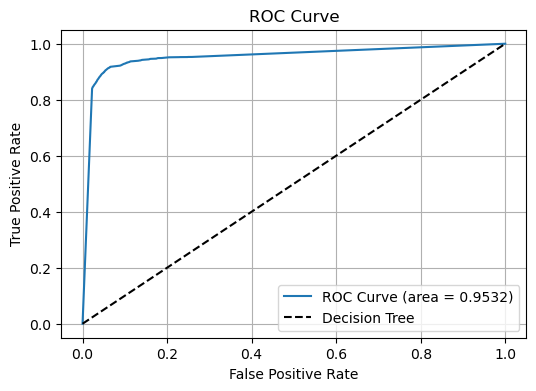

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Best model is Decision Tree
best_model = DT
# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix (Test):")
print(cm)
print()
print(f"Class 0 (No Claim):")
print(f"  True Negatives (TN): {tn} ‚Äî correctly predicted as 0")
print(f"  False Positives (FP): {fp} ‚Äî wrongly predicted as 1")
print()
print(f"Class 1 (Claim):")
print(f"  False Negatives (FN): {fn} ‚Äî wrongly predicted as 0")
print(f"  True Positives (TP): {tp} ‚Äî correctly predicted as 1\n")

# Classification Report
print("Classification Report (Test):")
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--', label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


**Interpretation:**
  
* True Negatives (TN = 10347): The model correctly identified 10,347 no-claim cases.

* False Positives (FP = 725): The model wrongly predicted 725 no-claim cases as claims.

* False Negatives (FN = 896): The model missed 896 claim cases (predicted as no-claim).

* True Positives (TP = 9970): The model correctly identified 9,970 claim cases.

**Classification Report Summary:**

| Metric    | Class 0 (No Claim) | Class 1 (Claim) | Interpretation                                        |
| --------- | ------------------ | --------------- | ----------------------------------------------------- |
| Precision | 0.92               | 0.93            | High precision ‚Äî most predicted positives are correct |
| Recall    | 0.93               | 0.92            | High recall ‚Äî model identifies most actual positives  |
| F1-score  | 0.93               | 0.92            | Balanced precision and recall                         |
| Support   | 11,072             | 10,866          | Number of samples in each class                       |


* Accuracy: 93% ‚Äî overall, the model predicts correctly for 93% of cases.

* ROC-AUC: 0.9532 ‚Äî excellent model discrimination between classes.

**Key Observations:**

* The decision tree performs very well on both classes, with high precision and recall.

* False positives and false negatives are relatively low compared to the total samples, indicating balanced performance.

* ROC-AUC > 0.95 shows the model has excellent ability to distinguish claim vs no-claim cases.

* This suggests the decision tree is a strong candidate for your insurance claim prediction task.

### 10. Model Tuning

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Setup GridSearchCV with f1 scoring (good for classification)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


[[10485   587]
 [  914  9952]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11072
           1       0.94      0.92      0.93     10866

    accuracy                           0.93     21938
   macro avg       0.93      0.93      0.93     21938
weighted avg       0.93      0.93      0.93     21938

ROC-AUC: 0.9620414881919419


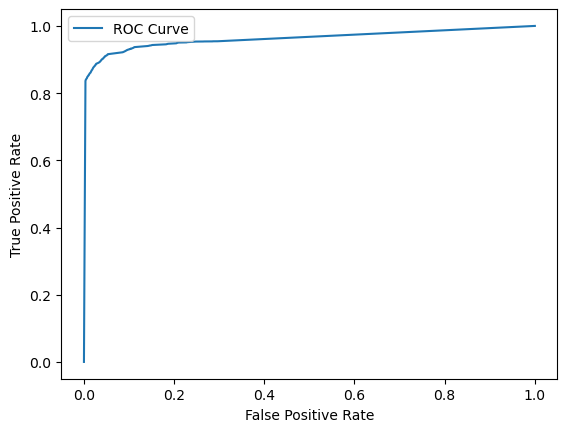

In [110]:
# Best estimator
best_dt = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_dt.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1]))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### 10. Final report and export

In [120]:
import joblib

# Save the tuned decision tree model
joblib.dump(best_dt, "insurance_claim_model.pkl")

# Save test data used
X_test.to_csv("test_features.csv", index=False)
y_test.to_csv("test_labels.csv", index=False)

In [118]:
pip install streamlit shap scikit-learn pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [125]:
import streamlit as st
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# Load model
model = joblib.load("insurance_claim_model.pkl")

# Load test data (same features used for prediction)
data = pd.read_csv("test_features.csv")

st.title("üöó Insurance Claim Prediction Dashboard")

st.write("## Sample Input Data")
st.dataframe(data.head())

# Predict and display results
predictions = model.predict(data)
st.write("## üîç Model Predictions")
st.dataframe(pd.DataFrame({'Prediction': predictions}))

# Explain the model using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)

st.write("## üìä SHAP Feature Importance")

# SHAP summary bar plot for positive class (class 1)
fig, ax = plt.subplots()
shap.summary_plot(shap_values[1], data, plot_type="bar", show=False)
st.pyplot(fig)

# Individual prediction explanation with force plot
st.write("## üîé Individual Prediction Explanation")
row_idx = st.slider("Choose row index", 0, len(data)-1, 0)

shap.initjs()
force_plot = shap.force_plot(
    explainer.expected_value[1],         # base value for positive class
    shap_values[1][row_idx],              # SHAP values for positive class for selected row
    data.iloc[row_idx],
    matplotlib=False
)

st.components.v1.html(force_plot.html(), height=300)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.